# Exploratory Data Analysis

This Jupyter Notebook is intended to provide a generic template for conducting exploratory data analysis on a raw dataset. It does not make any changes to the data, just analyzes it. It primarily works with numeric columns since it doesn't transform text values, which is handled in a separate Jupyter Notebook (step 2).

This notebook is intended to be the first in a 3 step process:
1) Exploratory Data Analysis
2) Data Preparation
3) Model Training and Evaluation

This notebook walks through the Exploratory Data Analysis processes:
* Loading a CSV file into a Pandas dataframe
* Displaying common statistics (mean, median, range, standard deviation, etc)
* Inspecting initial data types and investigating potential data types
* Identifying features that have the highest variance
* Visualizing features via histograms
* Locating features that have missing values
* Looking for outliers
* Identifying features for potential one-hot encoding
* Investigating feature and label correlations

Style guides:
* PEP-8 <TBD>

Import dependencies, define a method

In [70]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_theme()

def pretty_print_dict(dictname):
    """prints a dict in an easier to read table format"""
    # max_key_length = max(len(ele) for ele in dictname.keys()) + 1
    format_string="{:<30} {:<30}"
    print(format_string.format('Key','Value'))
    for k, v in dictname.items():
        print(format_string.format(k, v))

### Load the data into a Pandas dataframe

Define the path to the dataset file

Define the name of the label column

In [71]:
rootdir = os.getcwd()
infile = os.path.join(rootdir, 'eCornell/CTECH462_Managing_Data_In_Machine_Learning/data', 'adult.data.full.asst')

# label_column_name = 'label'
label_column_name = None

df = pd.read_csv(infile)

Preview the first 5 rows

In [72]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Common statistics for features

In [73]:
df_desc = df.describe(include='all')
num_rows = df.shape[0]
df_desc

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### View the data types for all columns

In [74]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

### Infer the data types for all columns

Get insight into which features whose data types may have been improperly detected by Pandas and need to be changed.

In [75]:
types_dict = {}
for column in df.columns:
    types_dict[column] = pd.api.types.infer_dtype(df[column])

types_dict

{'age': 'floating',
 'workclass': 'string',
 'fnlwgt': 'integer',
 'education': 'string',
 'education-num': 'integer',
 'marital-status': 'string',
 'occupation': 'string',
 'relationship': 'string',
 'race': 'string',
 'sex_selfID': 'string',
 'capital-gain': 'integer',
 'capital-loss': 'integer',
 'hours-per-week': 'floating',
 'native-country': 'string',
 'income_binary': 'string'}

### Determining which features have the highest variance

In [76]:
# How many features <TBD>
TOP_NUM_OF_FEAT_VARIANCE = 80

# create a list of the features that are numeric
numeric_column_names = df.select_dtypes(include=np.number).columns.tolist()

# If the user specifies more features/columns than are available, then just
# use all of them
TOP_NUM_OF_FEAT_VARIANCE = min(TOP_NUM_OF_FEAT_VARIANCE, len(numeric_column_names)-1)

# create a dataframe that describes just the numeric features
df_numeric_desc = df[numeric_column_names].describe(include='all')

# https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html
print('Numerical features with the highest variance')
df_numeric_desc.loc['std'].sort_values(ascending=False)[0:TOP_NUM_OF_FEAT_VARIANCE-1]


Numerical features with the highest variance


fnlwgt          105549.977697
capital-gain      2420.191974
capital-loss       402.960219
age                 13.647862
Name: std, dtype: float64

# Plot a histagram for a specific feature

<Axes: xlabel='age', ylabel='Count'>

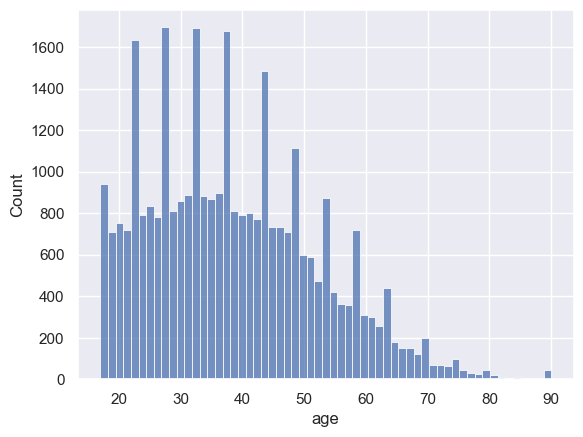

In [77]:
# plot on a specific feature using Seaborn
sns.histplot(data=df, x="age")

# optionally save it as a PNG file
# plt.savefig(rootdir + '/histogram-age.png')

### Count the number of rows with missing values
Ordered by most to fewest missing values

In [78]:

nan_count = np.sum(df.isnull(), axis = 0).sort_values(ascending=False)
print(nan_count)

occupation        1843
workclass         1836
native-country     583
hours-per-week     325
age                162
fnlwgt               0
education            0
education-num        0
marital-status       0
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
income_binary        0
dtype: int64


# Looking for outliers 

Method 1: Calculating the min and max z-scores for each numeric column

Ideally the z-scores should vary between [-2,2] aka 95%, or [-3,3] aka 99.7%

In [79]:
from scipy import stats

zscore_max = {}
zscore_min = {}


for column in numeric_column_names:
    zscore_max[column] = max(stats.zscore(df[column], axis=None))
    zscore_min[column] = min(stats.zscore(df[column], axis=None))

print('\nZ-Scores Max:')
pretty_print_dict(zscore_max)

print('\nZ-Scores Min:')
pretty_print_dict(zscore_min)


Z-Scores Max:
Key                            Value                         
age                            nan                           
fnlwgt                         12.26856269254114             
education-num                  2.3008375546552444            
capital-gain                   5.564971370185212             
capital-loss                   10.593506563264937            
hours-per-week                 nan                           

Z-Scores Min:
Key                            Value                         
age                            nan                           
fnlwgt                         -1.681630787605559            
education-num                  -3.5296563996401558           
capital-gain                   -0.2544910642315373           
capital-loss                   -0.21665952703259014          
hours-per-week                 nan                           


### Finding outliers - Method 2: using the Interquadrant Range

In [80]:
# iterate through each numeric column


print(f'Number of samples outside IQR for column, out of {num_rows} total rows:')
iqr_format_string="{:<20} {:<8} {:<4.3}%"

iqr_outlier_dict = {}

for column in numeric_column_names:
    # define first and third quartiles
    Q3 = np.quantile(df[column], 0.75)
    Q1 = np.quantile(df[column], 0.25)
    IQR = Q3 - Q1
    # calculate the number of samples outside that range
    s = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
    
    iqr_outlier_dict[column] = s

iqr_outlier_list = sorted(iqr_outlier_dict.items(), key=lambda x:x[1], reverse=True)

for k, v in iqr_outlier_list:
    iter_percentage = v / num_rows * 100.0
    print(iqr_format_string.format(k,v, iter_percentage))


Number of samples outside IQR for column, out of 32561 total rows:
capital-gain         2712     8.33%
capital-loss         1519     4.67%
education-num        1198     3.68%
fnlwgt               992      3.05%
age                  0        0.0 %
hours-per-week       0        0.0 %


# Identify features for potential one-hot encoding
Locate features that have fewer than 10 unique values

Display unique values those features

In [81]:
MAX_UNIQUE_COLUMN_VALUES = 10

# get a Pandas Series that describes ALL of the column names and # of unique values in each column/feature
unique_column_names = df.describe(include='all').loc['unique']

# get the top MAX_UNIQUE_COLUMN_VALUES of features that have the least prevalent unique values, store in a List
column_names_with_few_unique_values = unique_column_names.loc[unique_column_names <= MAX_UNIQUE_COLUMN_VALUES].index.tolist()

# initialize an empty dict that will store results in the loop
interesting_columns_with_few_unique = {}

# loop through the column names that have the fewest unique values
for i in column_names_with_few_unique_values:
    # create/assign a value
    interesting_columns_with_few_unique[i] = df[i].unique().tolist()

# display the result
interesting_columns_with_few_unique

{'workclass': ['State-gov',
  'Self-emp-not-inc',
  'Private',
  'Federal-gov',
  'Local-gov',
  nan,
  'Self-emp-inc',
  'Without-pay',
  'Never-worked'],
 'marital-status': ['Never-married',
  'Married-civ-spouse',
  'Divorced',
  'Married-spouse-absent',
  'Separated',
  'Married-AF-spouse',
  'Widowed'],
 'relationship': ['Not-in-family',
  'Husband',
  'Wife',
  'Own-child',
  'Unmarried',
  'Other-relative'],
 'race': ['White',
  'Black',
  'Asian-Pac-Islander',
  'Amer-Indian-Inuit',
  'Other'],
 'sex_selfID': ['Non-Female', 'Female'],
 'income_binary': ['<=50K', '>50K']}

### Looking at columns that are strings for potential One Hot Encoding
Displays a list of the features (with a datatype of string) in ascending order of fewest to most number of unique values.

In [82]:
list_of_string_columns = df.select_dtypes(include=object).columns.tolist()
df[list_of_string_columns].nunique().sort_values(ascending=True)

sex_selfID         2
income_binary      2
race               5
relationship       6
marital-status     7
workclass          8
occupation        14
education         16
native-country    41
dtype: int64

# Investigating feature and label correlations
## Plot features against each other to look for relations

Ideally want each feature to have:
* 0 correlation with each other feature
* a correlation of -1 or 1 to the label/target

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


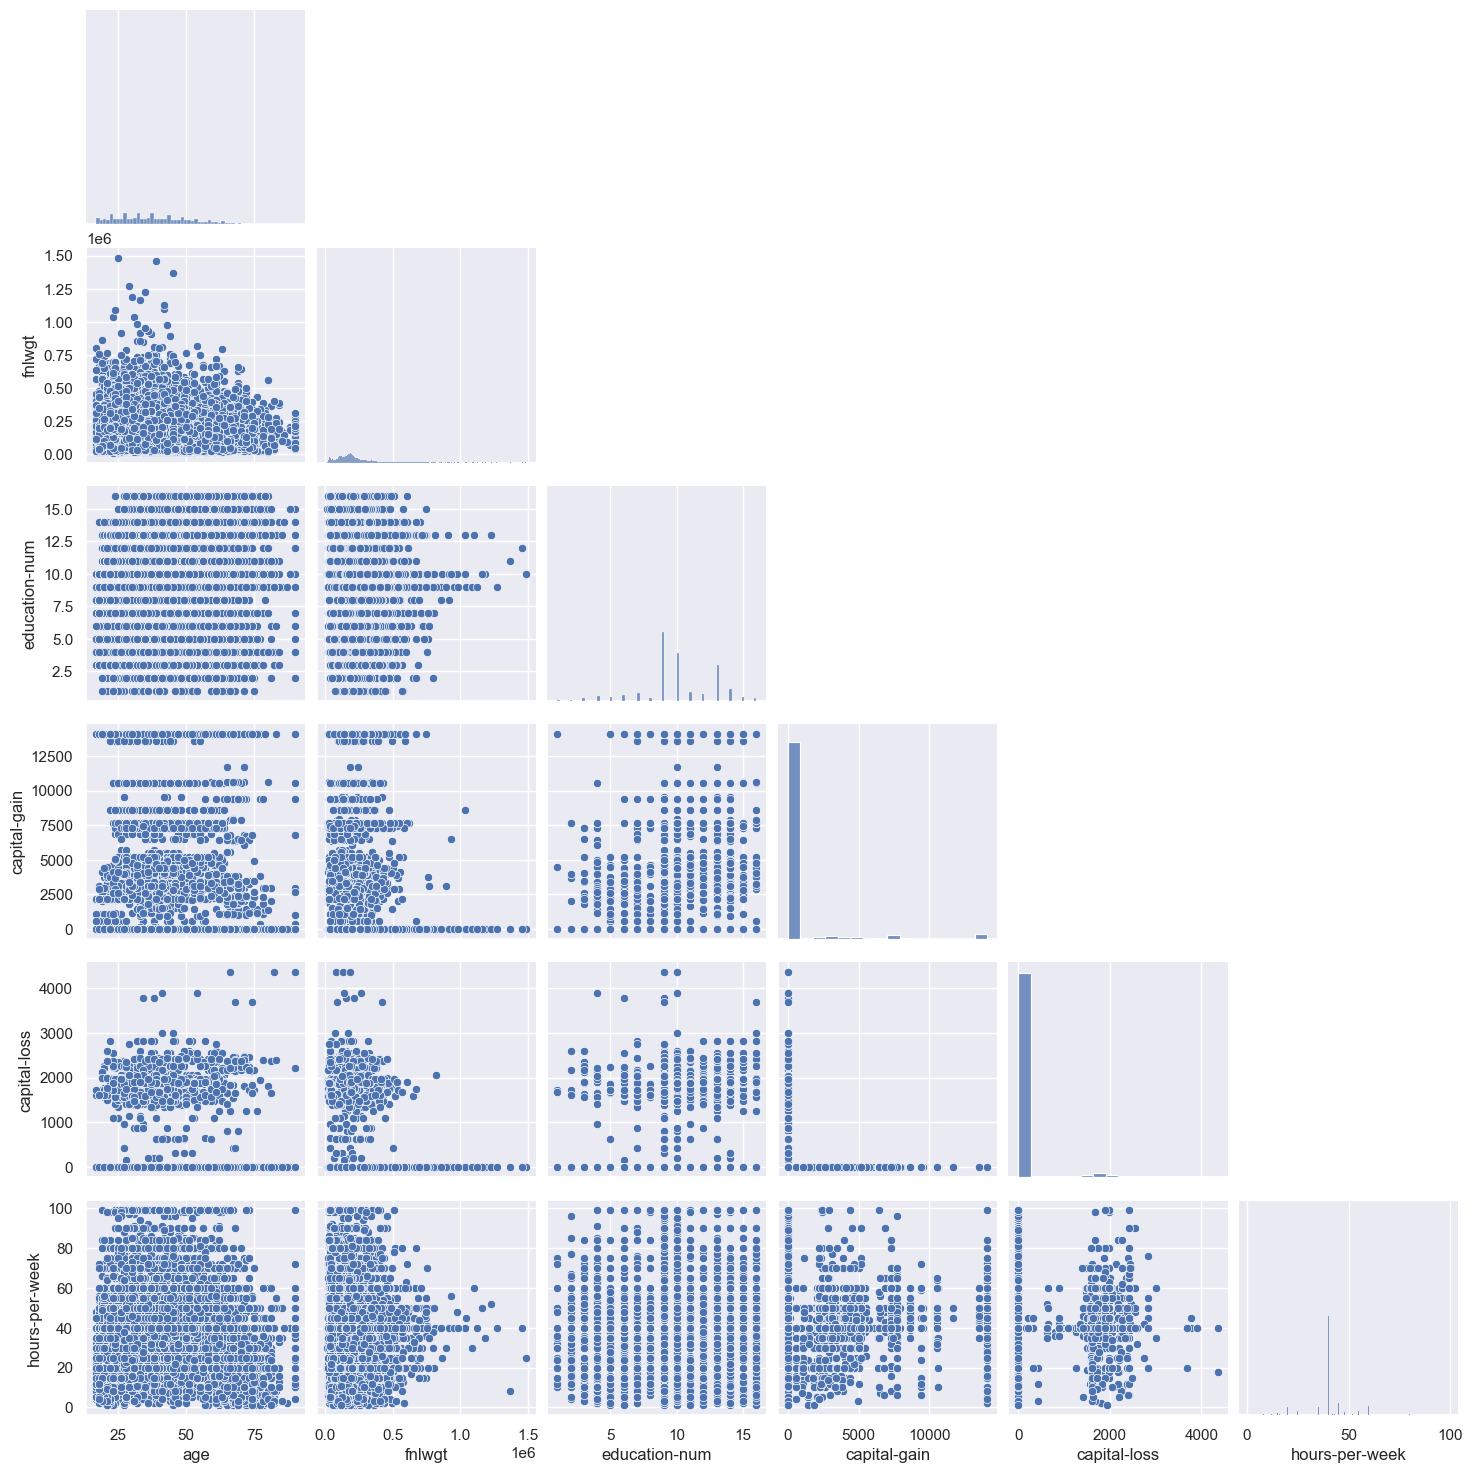

In [83]:
# create a list of columns to analyze, ignore anything with "weight" in it
# some of my data sets use the phrase "weight" to indicate the weight for each example
# columns_to_analyze = [item for item in numeric_column_names if 'weight' not in item]

columns_to_analyze = numeric_column_names

# print(columns_to_analyze)
df_numerical_only = df[columns_to_analyze].copy() 
sns.pairplot(data=df_numerical_only, corner=True)

# can ignore this warning:
# /usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight self._figure.tight_layout(*args, **kwargs)

## Comparing the features to each other with labels

Plots correlations between all the features, also include the label if available

(this is very inefficent with memory for large datsets)


/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


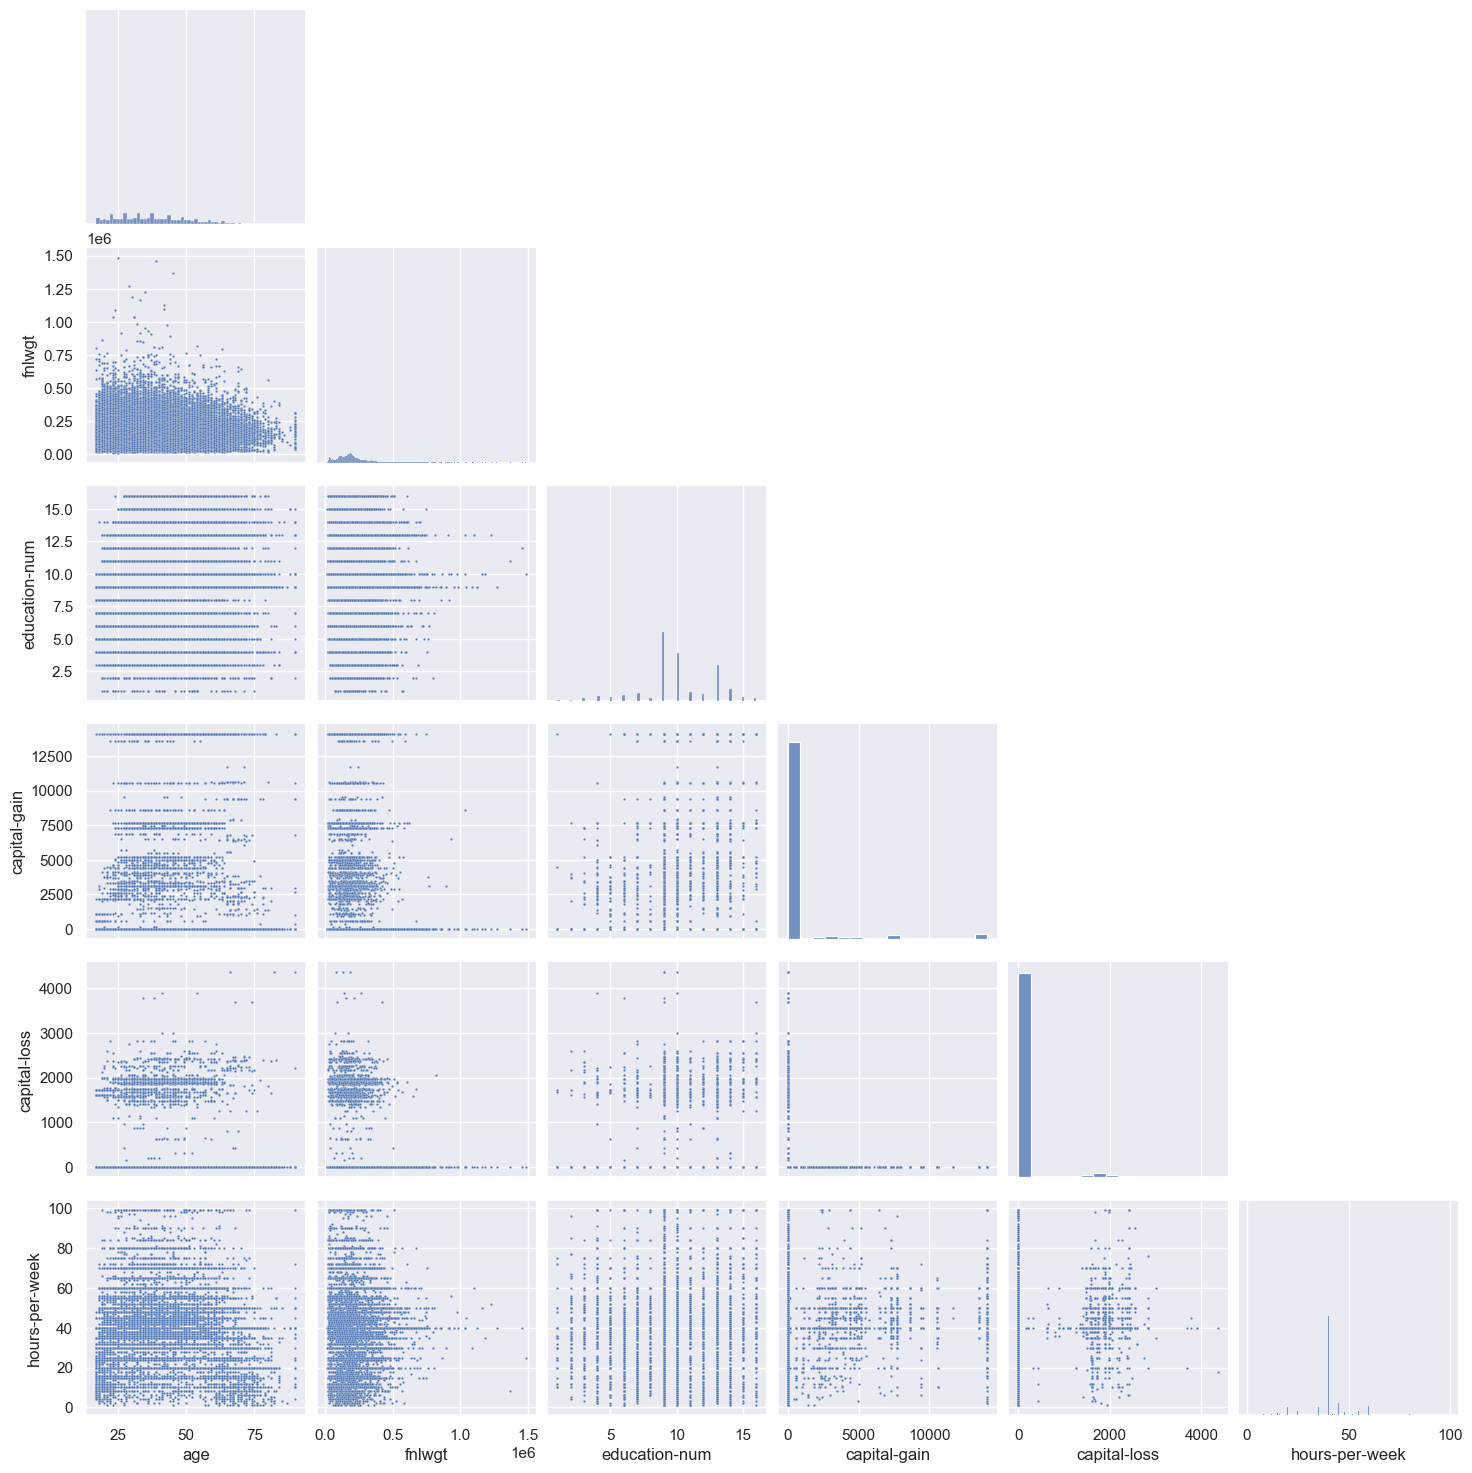

In [84]:
if label_column_name is not None:
    columns_to_analyze.append(label_column_name)
    print(columns_to_analyze)
    df_numerical_only = df[columns_to_analyze].copy()
    sns.pairplot(data=df_numerical_only, hue = label_column_name, plot_kws={'s':3}, corner=True)
else:
    df_numerical_only = df[columns_to_analyze].copy()
    sns.pairplot(data=df_numerical_only, plot_kws={'s':3}, corner=True)

### Correlation Matrix

Analyze the numeric columns for correlations

In [88]:
# create a new dataframe that is the correlation matrix of just the numeric columns
df_numeric_only_corr = df_numerical_only.corr()

# create another new dataframe that is the lower triangle of the previous result
df_lt = df_numeric_only_corr.where(np.tril(np.ones(df_numeric_only_corr.shape)).astype(np.bool))

# display the simlified correlation matrix for just numeric columns:
df_lt

/var/folders/90/cd8pt9qd43q0svfjsljg9ccr0000gn/T/ipykernel_3267/2025597413.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = df_numeric_only_corr.where(np.tril(np.ones(df_numeric_only_corr.shape)).astype(np.bool))


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,NaN,NaN,NaN,NaN,NaN
fnlwgt,-0.076267,1.000000,NaN,NaN,NaN,NaN
education-num,0.036761,-0.043195,1.000000,NaN,NaN,NaN
capital-gain,0.124901,-0.002234,0.167089,1.000000,NaN,NaN
capital-loss,0.057545,-0.010252,0.079923,-0.055138,1.0000,NaN
hours-per-week,0.067066,-0.018130,0.147256,0.101594,0.0545,1.0


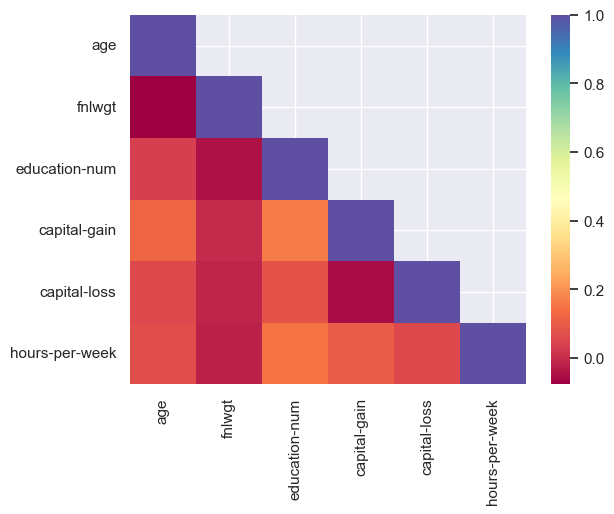

In [86]:
# display a heatmap of the simplified correlation matrix of just the numeric columns
hmap=sns.heatmap(df_lt, cmap="Spectral")

### Correlated columns chart

Display a list of the correlated columns in order from highest correlation (in magnitude, closest to -1 or 1) to lowest correlation (closest to zero). We don't care about the sign of the correlation, just the magnitude (absolute value).

In [89]:
from math import isnan

# intialize an empty list to store results
res = []

# iterate through the column names in alphabetical order for horizontal
for col1 in sorted(df_lt.columns):
    
    # iterate through the column names in alphabetical order for vertial
    for col2 in sorted(df_lt.columns):
        # extract the correlation value
        val = df_lt[col1][col2]
        
        # if the column names match, then skip this one, their correlation will be one
        # also skip if the answer is None / which is for the top right symmetric portion
        if col1 == col2 or isnan(val):
            continue
        
        # create a name that describes the two columns
        new_col_name = f'{col1}__vs__{col2}'
        
        # add this to the resulting list
        # the first column is the absolute value of the correlation, 
        # since I want to sort them by descending magnitude
        res.append([abs(val), val, new_col_name ])

# sort the list from highest magnitude to lowest
# the features with the highest correlation with each other may want to be removed
res = sorted(res, reverse=True)

# create a format string to design the output table
# < is left aligned     . is sig digs
correlation_vs_colname_format_str = "{:>18.3}   {:<36}"

print("Most to least correlated features\n")
print("Correlation [-1,1]   Features/Columns")
print("-------------------------------------")
# loop through and display the relevant results:
for i, correlation, vs_col_name in res:
    print(correlation_vs_colname_format_str.format(correlation, vs_col_name))

Most to least correlated features

Correlation [-1,1]   Features/Columns
-------------------------------------
             0.167   education-num__vs__capital-gain     
             0.147   education-num__vs__hours-per-week   
             0.125   age__vs__capital-gain               
             0.102   capital-gain__vs__hours-per-week    
            0.0799   education-num__vs__capital-loss     
           -0.0763   age__vs__fnlwgt                     
            0.0671   age__vs__hours-per-week             
            0.0575   age__vs__capital-loss               
           -0.0551   capital-gain__vs__capital-loss      
            0.0545   capital-loss__vs__hours-per-week    
           -0.0432   fnlwgt__vs__education-num           
            0.0368   age__vs__education-num              
           -0.0181   fnlwgt__vs__hours-per-week          
           -0.0103   fnlwgt__vs__capital-loss            
          -0.00223   fnlwgt__vs__capital-gain            


[[0.16708871979117862, 0.16708871979117862, 'education-num__vs__capital-gain'],
 [0.14725619837724285,
  0.14725619837724285,
  'education-num__vs__hours-per-week'],
 [0.12490076482094907, 0.12490076482094907, 'age__vs__capital-gain'],
 [0.10159360146533968,
  0.10159360146533968,
  'capital-gain__vs__hours-per-week'],
 [0.07992295668664588, 0.07992295668664588, 'education-num__vs__capital-loss'],
 [0.07626672175421619, -0.07626672175421619, 'age__vs__fnlwgt'],
 [0.06706586467305287, 0.06706586467305287, 'age__vs__hours-per-week'],
 [0.057545212381857495, 0.057545212381857495, 'age__vs__capital-loss'],
 [0.05513791361042499, -0.05513791361042499, 'capital-gain__vs__capital-loss'],
 [0.05449989119210671,
  0.05449989119210671,
  'capital-loss__vs__hours-per-week'],
 [0.04319463273302273, -0.04319463273302273, 'fnlwgt__vs__education-num'],
 [0.03676129383455727, 0.03676129383455727, 'age__vs__education-num'],
 [0.018129661901641246, -0.018129661901641246, 'fnlwgt__vs__hours-per-week'],
 